In [13]:
from read_data import *
from hyper import *
from alignment import *
from copy import *
from datasets.preprecossing import *
import rpy2
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster import hierarchy
from math import sin,cos,pi
import scipy 

import seaborn as sns

folder_path = './datas/miss/'
# folder_path2 = './datas/ohss/'
subsize = 20
pcanum = 20
tempnum = 200

In [20]:
datas = sc.read_h5ad("./datas/nature/adata_subset.h5")
indices = np.random.choice(datas.n_obs, size=subsize, replace=False)

# 提取抽取的细胞
subset = datas[indices, :]

# 抽取剩下的细胞
rest_indices = np.setdiff1d(np.arange(datas.n_obs), indices)
rest = datas[rest_indices, :]

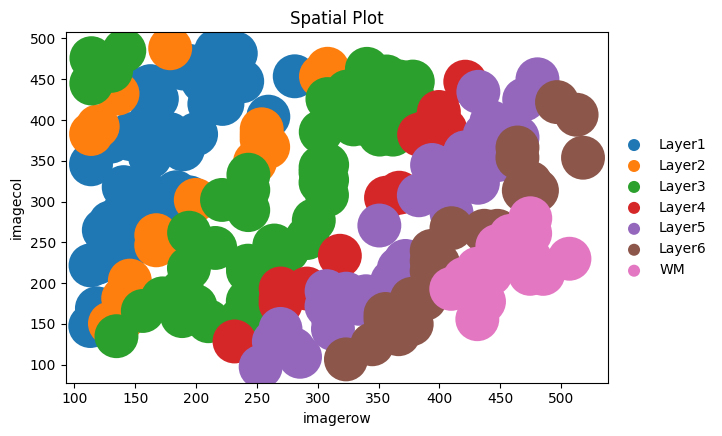

In [21]:
sc.pl.scatter(datas,'imagerow', 'imagecol', color='layer_guess_reordered', title='Spatial Plot',size=4000)

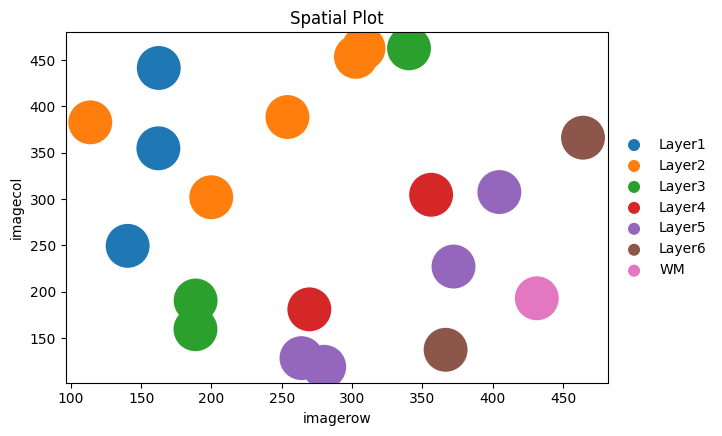

In [22]:
sc.pl.scatter(subset,'imagerow', 'imagecol', color='layer_guess_reordered', title='Spatial Plot',size=4000)

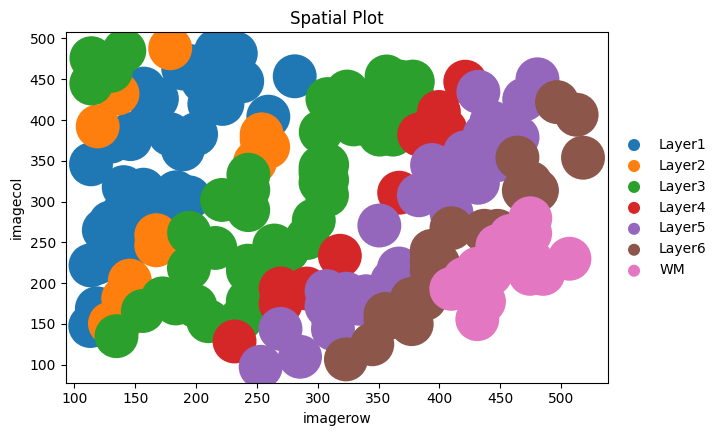

In [23]:
sc.pl.scatter(rest,'imagerow', 'imagecol', color='layer_guess_reordered', title='Spatial Plot',size=4000)

In [26]:
count_sub = rest.to_df()
xy_coords = pd.DataFrame(rest.obsm['spatial'],columns=['imagerow','imagecol'],index= rest.obs.index)
xy_coords.to_csv(folder_path+"xy.csv")
datas.obs.to_csv(folder_path+'meta_data.csv');
count_sub.T.to_csv(folder_path+"gene.csv")

In [27]:
# robjects.r("load(paste0('./datas/pca/DLPFC/LIBD_sample1.RData'))")
from rpy2.robjects.packages import importr
import rpy2.robjects as robjects

Spatialpc  = importr('SpatialPCA')
ggplot2 = importr('ggplot2')
matrix = importr('Matrix')
robjects.r("xy_coords <- read.csv('{}',row.names='X')".format(folder_path + 'xy.csv'))
robjects.r("xy_coords=as.matrix(xy_coords)")
robjects.r("count_temp <- read.csv('{}',row.names='X')".format(folder_path + 'gene.csv'))
robjects.r('my_matrix <- do.call(cbind, count_temp)')
robjects.r('my_sparse_matrix <- Matrix(my_matrix, sparse = TRUE)')
robjects.r('count_sub <- as(my_sparse_matrix, "dgCMatrix")')
robjects.r('rownames(count_sub) <- rownames(count_temp)')
robjects.r("rownames(xy_coords) = colnames(count_sub)");
robjects.r('LIBD = CreateSpatialPCAObject(counts=count_sub, location=xy_coords, project = "SpatialPCA",gene.type="spatial",sparkversion="spark",numCores_spark=5,gene.number=3000, customGenelist=NULL,min.loctions = 20, min.features=20)')
robjects.r('LIBD = SpatialPCA_buildKernel(LIBD, kerneltype="gaussian", bandwidthtype="SJ",bandwidth.set.by.user=NULL)')
robjects.r('LIBD = SpatialPCA_EstimateLoading(LIBD,fast=FALSE,SpatialPCnum={})'.format(pcanum))
robjects.r('LIBD = SpatialPCA_SpatialPCs(LIBD, fast=FALSE)')
robjects.r('write.csv(as.data.frame(LIBD@SpatialPCs), file = "{}")'.format(folder_path + "pca.csv"))


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    ## Use SCTransform function in Seurat to normalize data. 


R[write to console]: Calculating cell attributes from input UMI matrix: log_umi

R[write to console]: Variance stabilizing transformation of count matrix of size 4055 by 180

R[write to console]: Model formula is y ~ log_umi

R[write to console]: Get Negative Binomial regression parameters per gene

R[write to console]: Using 2000 genes, 180 cells



  |======================================================================| 100%


R[write to console]: Found 16 outliers - those will be ignored in fitting/regularization step


R[write to console]: Second step: Get residuals using fitted parameters for 4055 genes



  |======================================================================| 100%


R[write to console]: Computing corrected count matrix for 4055 genes



  |======================================================================| 100%


R[write to console]: Calculating gene attributes

R[write to console]: Wall clock passed: Time difference of 3.067951 secs

R[write to console]: Determine variable features

R[write to console]: Place corrected count matrix in counts slot

R[write to console]: Centering data matrix

  |                                                                            
  |                                                                      |   0%
  |                                                                            
  |============                                                          |  17%
  |                                                                            
  |=======================                                               |  33%
  |                                                                            
  |===================================                                   |  50%
  |                                                                         

## Use spark.test function in SPARK package to select spatially variable genes. 
## ===== SPARK INPUT INFORMATION ==== 
## number of total samples:  180 
## number of total features:  4055 
## number of adjusted covariates:  0 
# fitting normalized count-based spatial model under the null hypothesis ... 
## testing Gaussian kernel: 1...
## testing Periodic kernel: 1...
## testing Gaussian kernel: 2...
## testing Periodic kernel: 2...
## testing Gaussian kernel: 3...
## testing Periodic kernel: 3...
## testing Gaussian kernel: 4...
## testing Periodic kernel: 4...
## testing Gaussian kernel: 5...
## testing Periodic kernel: 5...
## Identified  21  spatial genes through spark.test function. 
The  number of significant spatial genes is less than the specified number of spatial genes. 
## Using  21  significant spatially variable genes. 
## Selected kernel type is:  gaussian  
## The bandwidth is:  0.327535959850919  
## Calculating kernel matrix
## Finished calculating kernel matrix.
[1] 

In [29]:
adata1 = pd.read_csv(folder_path + 'pca.csv')
adata1 = adata1.set_index(adata1.columns[0])
adata1 = adata1.T
adata1.index = rest.obs.layer_guess_reordered
adata1.to_csv(folder_path+'datas.data',header=None);
adata1.to_csv(folder_path+'datas.csv')

./datas/miss/datas.data length:180
Generating all pairs superset


100%|██████████| 1563/1563 [01:06<00:00, 23.47ex/s, loss=0.942357] 


	 Epoch 0 | average train loss: 0.895025
Optimization finished.


100%|██████████| 1563/1563 [01:06<00:00, 23.62ex/s, loss=0.875078] 


	 Epoch 1 | average train loss: 0.807154
Optimization finished.


100%|██████████| 1563/1563 [01:05<00:00, 23.77ex/s, loss=0.808951] 


	 Epoch 2 | average train loss: 0.796907
Optimization finished.


100%|██████████| 1563/1563 [01:04<00:00, 24.21ex/s, loss=0.910374] 


	 Epoch 3 | average train loss: 0.792815
Optimization finished.


100%|██████████| 1563/1563 [01:04<00:00, 24.37ex/s, loss=0.870321] 


	 Epoch 4 | average train loss: 0.791253
Optimization finished.


100%|██████████| 1563/1563 [01:05<00:00, 23.88ex/s, loss=0.771963] 


	 Epoch 5 | average train loss: 0.790972
Optimization finished.


100%|██████████| 1563/1563 [01:04<00:00, 24.17ex/s, loss=0.949714] 


	 Epoch 6 | average train loss: 0.790738
Optimization finished.


100%|██████████| 1563/1563 [01:07<00:00, 23.21ex/s, loss=0.760655] 


	 Epoch 7 | average train loss: 0.790817
Optimization finished.


100%|██████████| 1563/1563 [01:05<00:00, 24.01ex/s, loss=0.723801] 


	 Epoch 8 | average train loss: 0.790755
Optimization finished.


100%|██████████| 1563/1563 [01:04<00:00, 24.20ex/s, loss=0.801402] 


	 Epoch 9 | average train loss: 0.790883
Optimization finished.


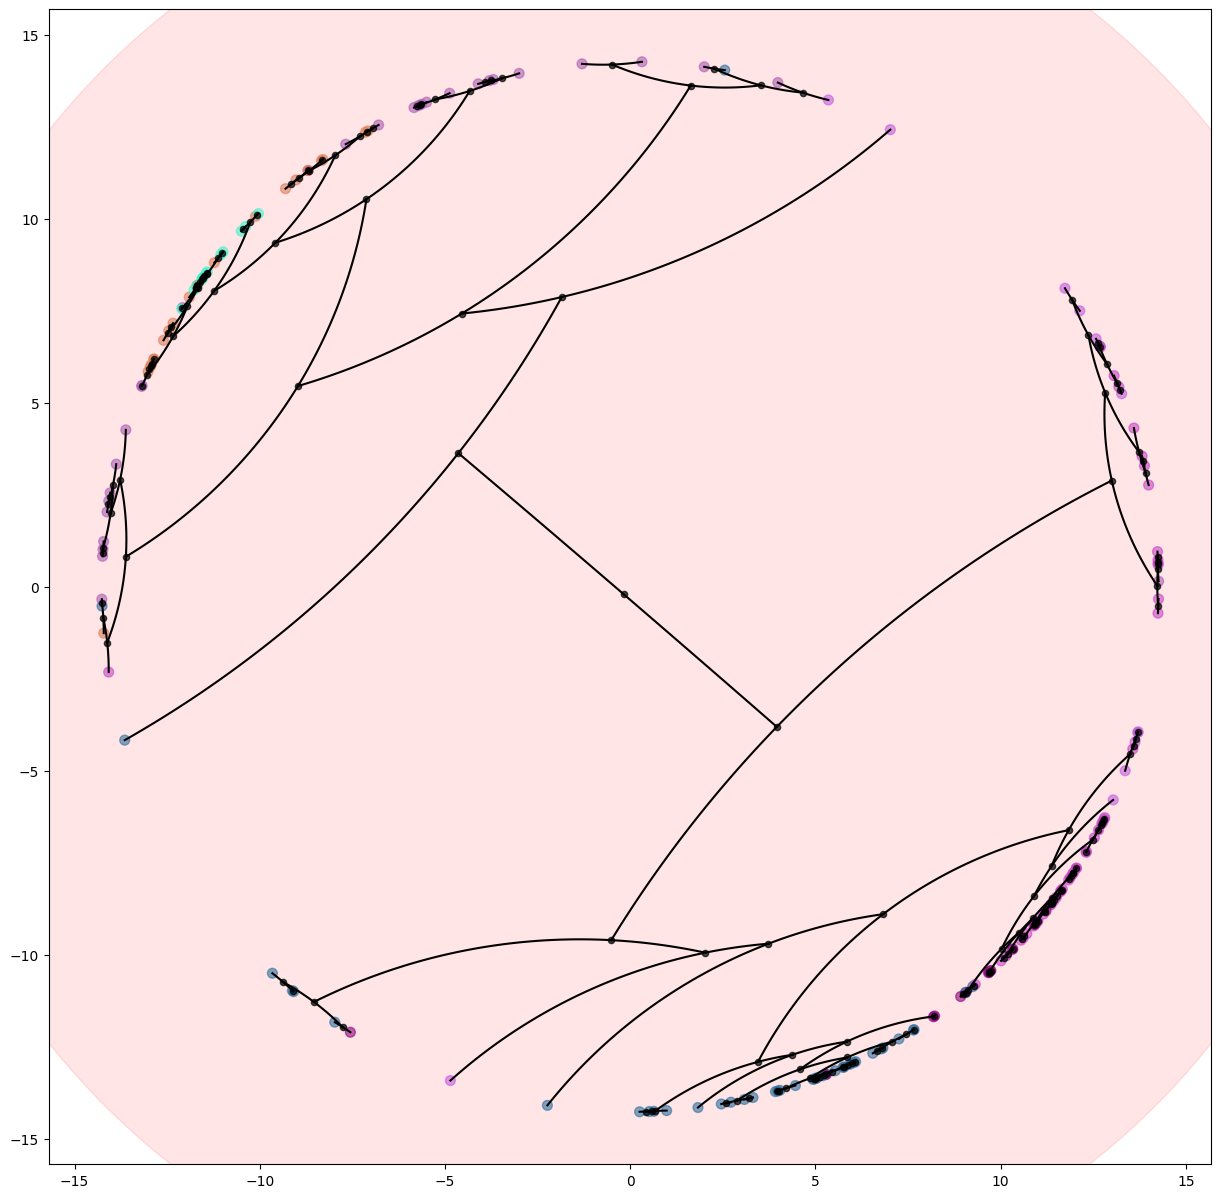

In [30]:
get_Hyper_tree(folder_path+'datas.data',1,adata1.shape[1]+1,0,10,model_path=None,save_path=folder_path,c=-1)


In [75]:
def search_tree(now,c,merge_list):
    if(len(now.son) != 2):
        return now;
    lson = search_tree(now.son[0],c,merge_list);
    now.son[0] = lson;
    rson = search_tree(now.son[1],c,merge_list);
    now.son[1] = rson

    if(np.linalg.norm(lson.value-rson.value)<=c):
        if(len(lson.son)>1 and len(rson.son)>1):
            pass
        elif(len(lson.son)>1):
            merge_list.append((rson.name,lson.name))
            print(rson.name,lson.name)
            now = rson;
            now.son.append(lson);
        else:
            merge_list.append((rson.name,lson.name))
            print(rson.name,lson.name)
            now = lson;
            now.son.append(rson)
    return now;

In [101]:
def search_miss_node(now,anslist,smalllist,n):
    if(len(now.son) == 0):
        return now;
    if(len(now.son)==1):
        search_miss_node(now.son[0],anslist,smalllist,n);
        return now;
    lson = search_miss_node(now.son[0],anslist,smalllist,n);
    rson = search_miss_node(now.son[1],anslist,smalllist,n);
    if((int(lson.name)<n and int(rson.name)>n )):
        smalllist.append(int(lson.name))
        anslist.append((lson,rson));
    elif (int(lson.name)>n and int(rson.name)<n ):
        smalllist.append(int(rson.name))
        anslist.append((lson,rson));
    return now
nodes1,n1 = build_hyper_tree(folder_path)
# show_tree(nodes1[0]).show_fig()
anslist = [];
mergelist= []
smalllist = []
search_tree(nodes1[0],2,mergelist)
search_miss_node(nodes1[0],anslist,smalllist,(n1+1)/2)
len(anslist),len(mergelist)

170 109
109 52
52 6
144 122
122 91
91 167
167 322
72 22
172 17
178 25
25 17
17 22
138 11
11 89
89 134
134 22
177 152
161 61
24 10
179 174
174 67
67 10
10 61
114 29
162 80
80 96
76 3
3 96
132 57
57 182
57 63
63 96
165 5
5 28
28 268
129 77
77 36
100 55
55 12
12 169
169 36
36 9
173 0
0 160
160 111
111 9
131 88
166 98
98 88
142 43
43 88
350 81
81 175
154 83
86 38
38 37
37 42
303 83
158 147
147 163
163 1
105 8
8 65
99 71
71 136
136 65
337 1
75 53
145 13
13 171
171 53
155 2
2 106
106 101
139 16
78 21
87 56
56 73
73 275
90 60
137 66
66 60
186 168
168 60
116 110
140 32
32 20
20 110
110 23
23 168
120 119
119 159
159 74
74 23
319 16
102 51
62 31
146 126
126 31
31 54
54 150
150 51
82 49
69 35
35 151
151 49
148 95
133 26
26 93
93 95
113 97
97 193
176 143
103 30
149 130
130 30
30 143
232 121
156 92
124 58
58 112
112 92
153 115
128 118
85 48
48 44
44 15
15 223
15 115
270 121
310 70
108 27
127 64
64 27
27 104
336 18
18 157
357 175


(38, 138)

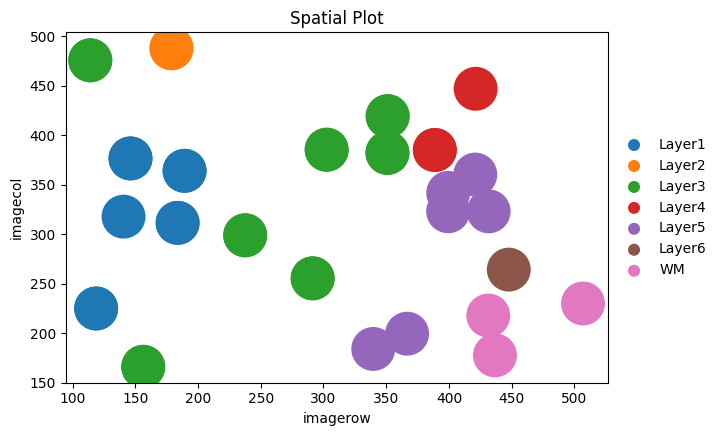

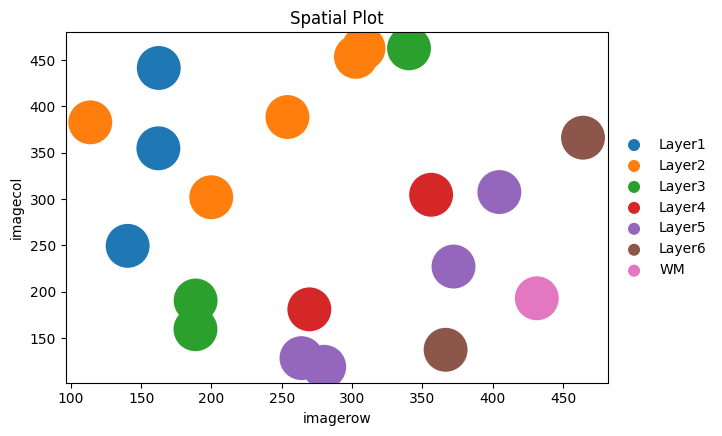

In [102]:
rest[smalllist,:]
sc.pl.scatter(rest[smalllist,:],'imagerow', 'imagecol', color='layer_guess_reordered', title='Spatial Plot',size=4000)
sc.pl.scatter(subset,'imagerow', 'imagecol', color='layer_guess_reordered', title='Spatial Plot',size=4000)

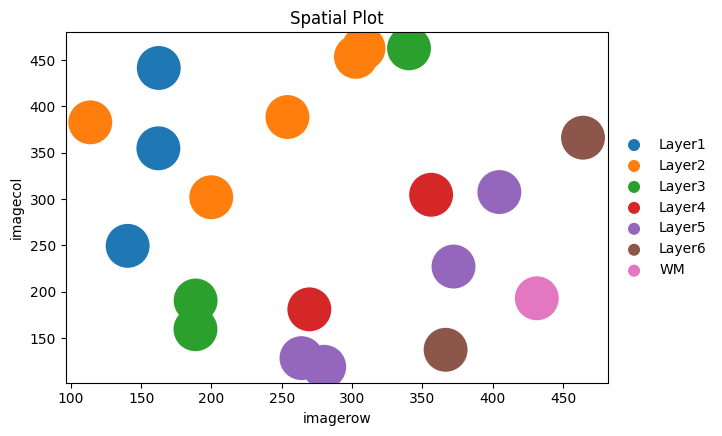

array([111, 136,  61, 134,  62, 128, 135, 114,  25,  28,   5,  98,  99,
       127,  86,  75,  48, 133, 182, 167])

In [66]:
smalllist

[52,
 6,
 135,
 91,
 167,
 89,
 134,
 67,
 164,
 96,
 63,
 34,
 28,
 36,
 12,
 169,
 9,
 160,
 111,
 81,
 175,
 37,
 42,
 45,
 163,
 1,
 65,
 136,
 171,
 106,
 101,
 39,
 73,
 168,
 20,
 23,
 159,
 74,
 94,
 54,
 150,
 151,
 121,
 112,
 14,
 44,
 15,
 70,
 104,
 18,
 157]